#1: IMPORT LIBRARIES & DATASETS AND PERFORM DATA VISUALIZATION

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [3]:
# Read the stock data file
stock_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Udemy Python/Data/stock.csv")
stock_df = stock_df[stock_df.columns[1:]]

In [4]:
stock_df.head()

,Date,AAPL,AMZN,BA,GOOG,IBM,MGM,T,TSLA,sp500
0,2012-01-12,15.049643,175.929993,75.510002,313.644379,180.550003,12.13,30.120001,5.650,1295.500000
1,2012-01-13,14.993214,178.419998,74.599998,311.328064,179.160004,12.35,30.070000,4.558,1289.089966
2,2012-01-17,15.167857,181.660004,75.239998,313.116364,180.000000,12.25,30.250000,5.320,1293.670044
3,2012-01-18,15.325357,189.440002,75.059998,315.273285,181.070007,12.73,30.330000,5.362,1308.040039
4,2012-01-19,15.276786,194.449997,75.559998,318.590851,180.520004,12.80,30.420000,5.352,1314.500000


In [5]:
# Sort the data based on Date
stock_df=stock_df.sort_values(by = ["Date"])
stock_df

,Date,AAPL,AMZN,BA,GOOG,IBM,MGM,T,TSLA,sp500
0,2012-01-12,15.049643,175.929993,75.510002,313.644379,180.550003,12.130000,30.120001,5.650000,1295.500000
1,2012-01-13,14.993214,178.419998,74.599998,311.328064,179.160004,12.350000,30.070000,4.558000,1289.089966
2,2012-01-17,15.167857,181.660004,75.239998,313.116364,180.000000,12.250000,30.250000,5.320000,1293.670044
3,2012-01-18,15.325357,189.440002,75.059998,315.273285,181.070007,12.730000,30.330000,5.362000,1308.040039
4,2012-01-19,15.276786,194.449997,75.559998,318.590851,180.520004,12.800000,30.420000,5.352000,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2408,2021-08-09,146.089996,3341.870117,232.270004,2760.040039,141.250000,39.209999,27.850000,713.760010,4432.350098
2409,2021-08-10,145.600006,3320.679932,235.779999,2761.929932,141.380005,39.720001,28.090000,709.989990,4436.750000
2410,2021-08-11,145.860001,3292.110107,239.490005,2753.790039,142.130005,40.560001,28.160000,707.820007,4442.410156
2411,2021-08-12,148.889999,3303.500000,238.179993,2767.790039,143.070007,40.709999,28.020000,722.250000,4460.830078


- **Use Plotly express to visualize raw stock data and normalized ones** 

In [6]:
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [7]:
def interactive_plot(df, title):
  fig = px.line(title=title)
  for i in df.columns[1:]:
    fig.add_scatter(x=df["Date"],y=df[i],name=i)
  fig.show()

In [8]:
interactive_plot(stock_df,"Prices")

In [9]:
interactive_plot(normalize(stock_df),"Normalized Prices")

In [10]:
# Define a function to plot the entire dataframe
# The function takes in a dataframe df as an input argument and does not return anything back!
# The function performs data visualization
# Pandas works great with matplotlib, simply plot data directly from a Pandas DataFrame using plot() method

def show_plot(df, figure_title):
  df.plot(x='Date', figsize = (15,7), linewidth = 3, title = figure_title)
  plt.grid()
  plt.show()

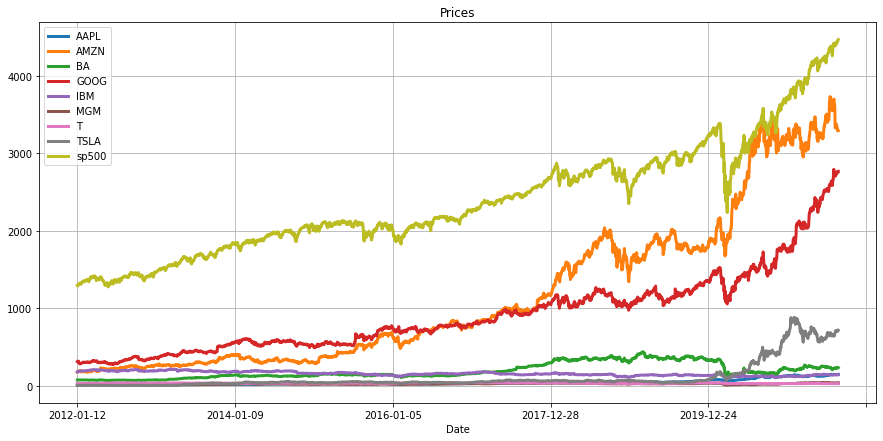

In [11]:
show_plot(stock_df,"Prices")

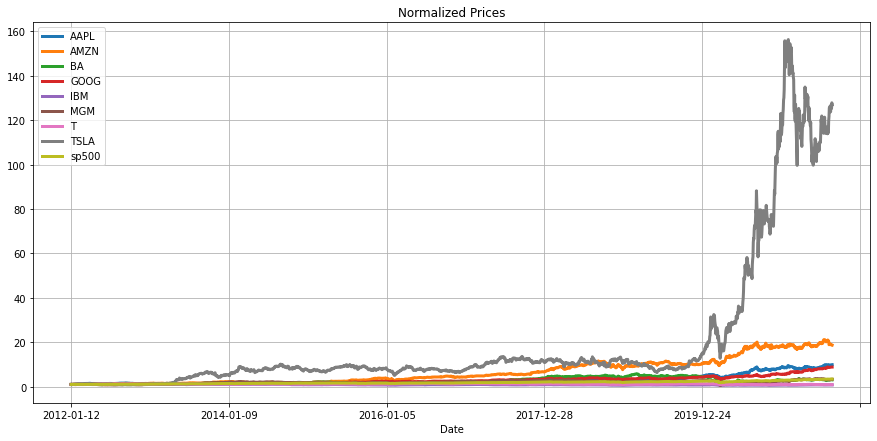

In [12]:
show_plot(normalize(stock_df),"Normalized Prices")

#2: PERFORM RANDOM ASSET ALLOCATION AND CALCULATE PORTFOLIO DAILY RETURN

In [13]:
# Set random seed
np.random.seed(101)

# Create random weights for the stocks
weights = np.array(np.random.random(9))
weights

array([0.51639863, 0.57066759, 0.02847423, 0.17152166, 0.68527698,
       0.83389686, 0.30696622, 0.89361308, 0.72154386])

In [14]:
#normalize the weights so that the sum of all the weights is 1
weights = weights/np.sum(weights)
weights

array([0.10921307, 0.12069041, 0.00602201, 0.03627509, 0.14492913,
       0.17636073, 0.06492024, 0.1889901 , 0.15259921])

In [15]:
# Normalize the stock avalues 
df_portfolio = normalize(stock_df)
df_portfolio

,Date,AAPL,AMZN,BA,GOOG,IBM,MGM,T,TSLA,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996250,1.014153,0.987949,0.992615,0.992301,1.018137,0.998340,0.806726,0.995052
2,2012-01-17,1.007855,1.032570,0.996424,0.998317,0.996954,1.009893,1.004316,0.941593,0.998587
3,2012-01-18,1.018320,1.076792,0.994040,1.005193,1.002880,1.049464,1.006972,0.949027,1.009680
4,2012-01-19,1.015093,1.105269,1.000662,1.015771,0.999834,1.055235,1.009960,0.947257,1.014666
...,...,...,...,...,...,...,...,...,...,...
2408,2021-08-09,9.707207,18.995454,3.076016,8.799903,0.782332,3.232481,0.924635,126.329203,3.421343
2409,2021-08-10,9.674649,18.875008,3.122500,8.805928,0.783052,3.274526,0.932603,125.661943,3.424739
2410,2021-08-11,9.691925,18.712614,3.171633,8.779976,0.787206,3.343776,0.934927,125.277875,3.429109
2411,2021-08-12,9.893258,18.777355,3.154284,8.824612,0.792412,3.356142,0.930279,127.831856,3.443327


In [16]:
df_portfolio.columns[1:]

Index(['AAPL', 'AMZN', 'BA', 'GOOG', 'IBM', 'MGM', 'T', 'TSLA', 'sp500'], dtype='object')

In [17]:
# Note that enumerate returns the value and a counter as well

for counter,stock in enumerate(df_portfolio.columns[1:]):
  df_portfolio[stock] = (df_portfolio[stock] * weights[counter])*1000000
df_portfolio

,Date,AAPL,AMZN,BA,GOOG,IBM,MGM,T,TSLA,sp500
0,2012-01-12,1.092131e+05,1.206904e+05,6022.010143,36275.090893,144929.132244,176360.729910,64920.242520,1.889901e+05,152599.209597
1,2012-01-13,1.088036e+05,1.223986e+05,5949.436297,36007.193453,143813.367071,179559.362005,64812.470730,1.524632e+05,151844.160466
2,2012-01-17,1.100709e+05,1.246213e+05,6000.476990,36214.022376,144487.639784,178105.434544,65200.440954,1.779517e+05,152383.655875
3,2012-01-18,1.112139e+05,1.299585e+05,5986.121757,36463.484903,145346.544411,185084.253079,65372.871707,1.793566e+05,154076.322719
4,2012-01-19,1.108614e+05,1.333954e+05,6025.997336,36847.183810,144905.051951,186102.007848,65566.856819,1.790221e+05,154837.252810
...,...,...,...,...,...,...,...,...,...,...
2408,2021-08-09,1.060154e+06,2.292569e+06,18523.801909,319217.273116,113382.661775,570082.769421,60027.514229,2.387497e+07,522094.265967
2409,2021-08-10,1.056598e+06,2.278032e+06,18803.728037,319435.851958,113487.017879,577497.802245,60544.806490,2.374886e+07,522612.538155
2410,2021-08-11,1.058485e+06,2.258433e+06,19099.605370,318494.418400,114089.049711,589710.748547,60695.682886,2.367628e+07,523279.257854
2411,2021-08-12,1.080473e+06,2.266247e+06,18995.130331,320113.612963,114843.598234,591891.598141,60393.930095,2.415896e+07,525448.972651


In [18]:
# Let's create an additional column that contains the sum of all $ values in the portfolio
df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio!="Date"].sum(axis=1)
df_portfolio

,Date,AAPL,AMZN,BA,GOOG,IBM,MGM,T,TSLA,sp500,portfolio daily worth in $
0,2012-01-12,1.092131e+05,1.206904e+05,6022.010143,36275.090893,144929.132244,176360.729910,64920.242520,1.889901e+05,152599.209597,1.000000e+06
1,2012-01-13,1.088036e+05,1.223986e+05,5949.436297,36007.193453,143813.367071,179559.362005,64812.470730,1.524632e+05,151844.160466,9.656513e+05
2,2012-01-17,1.100709e+05,1.246213e+05,6000.476990,36214.022376,144487.639784,178105.434544,65200.440954,1.779517e+05,152383.655875,9.950356e+05
3,2012-01-18,1.112139e+05,1.299585e+05,5986.121757,36463.484903,145346.544411,185084.253079,65372.871707,1.793566e+05,154076.322719,1.012859e+06
4,2012-01-19,1.108614e+05,1.333954e+05,6025.997336,36847.183810,144905.051951,186102.007848,65566.856819,1.790221e+05,154837.252810,1.017563e+06
...,...,...,...,...,...,...,...,...,...,...,...
2408,2021-08-09,1.060154e+06,2.292569e+06,18523.801909,319217.273116,113382.661775,570082.769421,60027.514229,2.387497e+07,522094.265967,2.883102e+07
2409,2021-08-10,1.056598e+06,2.278032e+06,18803.728037,319435.851958,113487.017879,577497.802245,60544.806490,2.374886e+07,522612.538155,2.869588e+07
2410,2021-08-11,1.058485e+06,2.258433e+06,19099.605370,318494.418400,114089.049711,589710.748547,60695.682886,2.367628e+07,523279.257854,2.861857e+07
2411,2021-08-12,1.080473e+06,2.266247e+06,18995.130331,320113.612963,114843.598234,591891.598141,60393.930095,2.415896e+07,525448.972651,2.913736e+07


In [19]:
# Let's calculate the portfolio daily return 
# Define a new column in the dataframe and set it to zeros
df_portfolio["portfolio daily % return"] = 0.0000

for i in range(1,len(df_portfolio)):
  df_portfolio["portfolio daily % return"][i] = ((df_portfolio['portfolio daily worth in $'][i]-df_portfolio['portfolio daily worth in $'][i-1])/df_portfolio['portfolio daily worth in $'][i-1])*100
df_portfolio

,Date,AAPL,AMZN,BA,GOOG,IBM,MGM,T,TSLA,sp500,portfolio daily worth in $,portfolio daily % return
0,2012-01-12,1.092131e+05,1.206904e+05,6022.010143,36275.090893,144929.132244,176360.729910,64920.242520,1.889901e+05,152599.209597,1.000000e+06,0.000000
1,2012-01-13,1.088036e+05,1.223986e+05,5949.436297,36007.193453,143813.367071,179559.362005,64812.470730,1.524632e+05,151844.160466,9.656513e+05,-3.434868
2,2012-01-17,1.100709e+05,1.246213e+05,6000.476990,36214.022376,144487.639784,178105.434544,65200.440954,1.779517e+05,152383.655875,9.950356e+05,3.042953
3,2012-01-18,1.112139e+05,1.299585e+05,5986.121757,36463.484903,145346.544411,185084.253079,65372.871707,1.793566e+05,154076.322719,1.012859e+06,1.791187
4,2012-01-19,1.108614e+05,1.333954e+05,6025.997336,36847.183810,144905.051951,186102.007848,65566.856819,1.790221e+05,154837.252810,1.017563e+06,0.464499
...,...,...,...,...,...,...,...,...,...,...,...,...
2408,2021-08-09,1.060154e+06,2.292569e+06,18523.801909,319217.273116,113382.661775,570082.769421,60027.514229,2.387497e+07,522094.265967,2.883102e+07,1.687613
2409,2021-08-10,1.056598e+06,2.278032e+06,18803.728037,319435.851958,113487.017879,577497.802245,60544.806490,2.374886e+07,522612.538155,2.869588e+07,-0.468747
2410,2021-08-11,1.058485e+06,2.258433e+06,19099.605370,318494.418400,114089.049711,589710.748547,60695.682886,2.367628e+07,523279.257854,2.861857e+07,-0.269413
2411,2021-08-12,1.080473e+06,2.266247e+06,18995.130331,320113.612963,114843.598234,591891.598141,60393.930095,2.415896e+07,525448.972651,2.913736e+07,1.812799


- **Try at least 3 another random weights allocation and rerun the code to compare the final portfolio value on Aug 11th, 2020 to its initial value ($1M) on January 12th, 2012. Do you notice a big difference? Comment on your answer.**

In [20]:
np.random.seed()

# Create random weights for the stocks
weights = np.array(np.random.random(9))
weights = weights/np.sum(weights)
df_portfolio = normalize(stock_df)
for counter,stock in enumerate(df_portfolio.columns[1:]):
  df_portfolio[stock] = (df_portfolio[stock] * weights[counter])*1000000
df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio!="Date"].sum(axis=1)

df_portfolio["portfolio daily % return"] = 0.0000
for i in range(1,len(df_portfolio)):
  df_portfolio["portfolio daily % return"][i] = ((df_portfolio['portfolio daily worth in $'][i]-df_portfolio['portfolio daily worth in $'][i-1])/df_portfolio['portfolio daily worth in $'][i-1])*100
df_portfolio

,Date,AAPL,AMZN,BA,GOOG,IBM,MGM,T,TSLA,sp500,portfolio daily worth in $,portfolio daily % return
0,2012-01-12,95005.704691,5.564249e+04,199316.818253,1.516671e+05,14826.704892,199356.889683,184921.822556,5.899898e+04,40263.525915,1.000000e+06,0.000000
1,2012-01-13,94649.479068,5.643002e+04,196914.765155,1.505470e+05,14712.558614,202972.600199,184614.840402,4.759599e+04,40064.305091,9.885015e+05,-1.149846
2,2012-01-17,95751.972386,5.745475e+04,198604.112770,1.514117e+05,14781.538828,201329.091144,185719.952738,5.555302e+04,40206.651749,1.000813e+06,1.245450
3,2012-01-18,96746.243432,5.991538e+04,198128.982495,1.524547e+05,14869.407466,209217.896988,186211.112475,5.599160e+04,40653.264385,1.014189e+06,1.336494
4,2012-01-19,96439.619684,6.149993e+04,199448.786578,1.540590e+05,14824.241402,210368.359596,186763.668643,5.588718e+04,40854.036909,1.020145e+06,0.587285
...,...,...,...,...,...,...,...,...,...,...,...,...
2408,2021-08-09,922240.046061,1.056954e+06,613101.799992,1.334655e+06,11599.401997,644417.426894,170985.148912,7.453294e+06,137755.340041,1.234500e+07,1.252615
2409,2021-08-10,919146.825254,1.050252e+06,622366.810155,1.335569e+06,11610.077954,652799.326206,172458.628124,7.413926e+06,137892.086920,1.231602e+07,-0.234760
2410,2021-08-11,920788.124124,1.041216e+06,632159.774173,1.331633e+06,11671.667699,666604.752106,172888.391430,7.391267e+06,138068.001893,1.230630e+07,-0.078960
2411,2021-08-12,939915.965070,1.044819e+06,628701.853643,1.338403e+06,11748.860380,669069.968667,172028.864818,7.541949e+06,138640.484334,1.248528e+07,1.454376


In [21]:
np.random.seed()

# Create random weights for the stocks
weights = np.array(np.random.random(9))
weights = weights/np.sum(weights)
df_portfolio = normalize(stock_df)
for counter,stock in enumerate(df_portfolio.columns[1:]):
  df_portfolio[stock] = (df_portfolio[stock] * weights[counter])*1000000
df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio!="Date"].sum(axis=1)

df_portfolio["portfolio daily % return"] = 0.0000
for i in range(1,len(df_portfolio)):
  df_portfolio["portfolio daily % return"][i] = ((df_portfolio['portfolio daily worth in $'][i]-df_portfolio['portfolio daily worth in $'][i-1])/df_portfolio['portfolio daily worth in $'][i-1])*100
df_portfolio

,Date,AAPL,AMZN,BA,GOOG,IBM,MGM,T,TSLA,sp500,portfolio daily worth in $,portfolio daily % return
0,2012-01-12,1.945820e+05,23621.737835,172883.756356,1.910687e+05,27360.389850,28588.414986,120018.717709,1.655541e+05,76322.175661,1.000000e+06,0.000000
1,2012-01-13,1.938525e+05,23956.065462,170800.259509,1.896576e+05,27149.750556,29106.919427,119819.478895,1.335567e+05,75944.539416,9.638438e+05,-3.615620
2,2012-01-17,1.961105e+05,24391.093959,172265.568678,1.907470e+05,27277.042868,28871.234977,120536.723424,1.558846e+05,76214.366917,9.922981e+05,2.952168
3,2012-01-18,1.981469e+05,25435.697490,171853.449383,1.920610e+05,27439.190844,30002.514942,120855.497926,1.571152e+05,77060.950700,9.999704e+05,0.773183
4,2012-01-19,1.975189e+05,26108.378566,172998.223263,1.940820e+05,27355.843861,30167.494956,121214.120190,1.568222e+05,77441.528295,1.003709e+06,0.373842
...,...,...,...,...,...,...,...,...,...,...,...,...
2408,2021-08-09,1.888848e+06,448705.639025,531793.268328,1.681386e+06,21404.901695,92411.518124,110973.480772,2.091432e+07,261124.355649,2.595096e+07,1.724339
2409,2021-08-10,1.882513e+06,445860.478856,539829.568393,1.682537e+06,21424.602521,93613.509268,111929.804277,2.080385e+07,261383.568400,2.584294e+07,-0.416259
2410,2021-08-11,1.885874e+06,442024.470638,548323.805960,1.677578e+06,21538.256867,95593.251454,112208.731016,2.074027e+07,261717.026864,2.578512e+07,-0.223725
2411,2021-08-12,1.925050e+06,443553.766765,545324.469046,1.686107e+06,21680.704016,95946.771386,111650.877538,2.116309e+07,262802.205183,2.625520e+07,1.823066


In [22]:
np.random.seed()

# Create random weights for the stocks
weights = np.array(np.random.random(9))
weights = weights/np.sum(weights)
df_portfolio = normalize(stock_df)
for counter,stock in enumerate(df_portfolio.columns[1:]):
  df_portfolio[stock] = (df_portfolio[stock] * weights[counter])*1000000
df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio!="Date"].sum(axis=1)

df_portfolio["portfolio daily % return"] = 0.0000
for i in range(1,len(df_portfolio)):
  df_portfolio["portfolio daily % return"][i] = ((df_portfolio['portfolio daily worth in $'][i]-df_portfolio['portfolio daily worth in $'][i-1])/df_portfolio['portfolio daily worth in $'][i-1])*100
df_portfolio

,Date,AAPL,AMZN,BA,GOOG,IBM,MGM,T,TSLA,sp500,portfolio daily worth in $,portfolio daily % return
0,2012-01-12,1.481810e+05,1.523908e+05,130555.680058,1.373483e+05,180706.116111,14139.040715,25495.907306,1.258537e+05,85329.563247,1.000000e+06,0.000000
1,2012-01-13,1.476253e+05,1.545476e+05,128982.297147,1.363339e+05,179314.914855,14395.478695,25453.582455,1.015294e+05,84907.359143,9.730899e+05,-2.691007
2,2012-01-17,1.493449e+05,1.573541e+05,130088.846653,1.371171e+05,180155.637498,14278.915674,25605.948689,1.185030e+05,85209.031135,9.976574e+05,2.524686
3,2012-01-18,1.508957e+05,1.640931e+05,129777.628780,1.380616e+05,181226.570007,14838.415509,25673.666836,1.194385e+05,86155.527011,1.010161e+06,1.253269
4,2012-01-19,1.504174e+05,1.684328e+05,130642.121406,1.395144e+05,180676.091393,14920.010069,25749.849953,1.192158e+05,86581.019597,1.016149e+06,0.592852
...,...,...,...,...,...,...,...,...,...,...,...,...
2408,2021-08-09,1.438423e+06,2.894732e+06,401591.411825,1.208652e+06,141372.132203,45704.185347,23574.402670,1.589900e+07,291941.719791,2.234499e+07,1.497028
2409,2021-08-10,1.433599e+06,2.876377e+06,407660.140561,1.209479e+06,141502.249495,46298.656979,23777.557110,1.581502e+07,292231.524303,2.224595e+07,-0.443244
2410,2021-08-11,1.436159e+06,2.851629e+06,414074.687454,1.205915e+06,142252.897985,47277.782803,23836.810287,1.576668e+07,292604.336855,2.218043e+07,-0.294489
2411,2021-08-12,1.465992e+06,2.861495e+06,411809.694613,1.212045e+06,143193.713202,47452.624001,23718.303934,1.608811e+07,293817.585707,2.254764e+07,1.655531


#3: PORTFOLIO ALLOCATION - DAILY RETURN/WORTH CALCULATION (FUNCTION)

In [23]:
# Lets assume we have $1,000,000 to be invested and we will allocate this fund based on the weights of the stocks
# We will create a function that takes in the stock prices along with the weights and return:
# (1) Daily value of each individual securuty in $ over the specified time period
# (2) Overall daily worth of the entire portfolio 
# (3) Daily return 

def portfolio_allocation(df, weights):
  df_portfolio = df.copy()
  df_portfolio = normalize(df_portfolio)
  
  for counter,stock in enumerate(df_portfolio.columns[1:]):
    df_portfolio[stock] = (df_portfolio[stock] * weights[counter])*1000000
    
  df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio!="Date"].sum(axis=1)
  
  df_portfolio["portfolio daily % return"] = 0.0000
  for i in range(1,len(df_portfolio)):
    df_portfolio["portfolio daily % return"][i] = ((df_portfolio['portfolio daily worth in $'][i]-df_portfolio['portfolio daily worth in $'][i-1])/df_portfolio['portfolio daily worth in $'][i-1])*100
  
  return df_portfolio

- **Call the function to ensure that the results make sense**

In [24]:
df_portfolio = portfolio_allocation(stock_df,weights)
df_portfolio

,Date,AAPL,AMZN,BA,GOOG,IBM,MGM,T,TSLA,sp500,portfolio daily worth in $,portfolio daily % return
0,2012-01-12,1.481810e+05,1.523908e+05,130555.680058,1.373483e+05,180706.116111,14139.040715,25495.907306,1.258537e+05,85329.563247,1.000000e+06,0.000000
1,2012-01-13,1.476253e+05,1.545476e+05,128982.297147,1.363339e+05,179314.914855,14395.478695,25453.582455,1.015294e+05,84907.359143,9.730899e+05,-2.691007
2,2012-01-17,1.493449e+05,1.573541e+05,130088.846653,1.371171e+05,180155.637498,14278.915674,25605.948689,1.185030e+05,85209.031135,9.976574e+05,2.524686
3,2012-01-18,1.508957e+05,1.640931e+05,129777.628780,1.380616e+05,181226.570007,14838.415509,25673.666836,1.194385e+05,86155.527011,1.010161e+06,1.253269
4,2012-01-19,1.504174e+05,1.684328e+05,130642.121406,1.395144e+05,180676.091393,14920.010069,25749.849953,1.192158e+05,86581.019597,1.016149e+06,0.592852
...,...,...,...,...,...,...,...,...,...,...,...,...
2408,2021-08-09,1.438423e+06,2.894732e+06,401591.411825,1.208652e+06,141372.132203,45704.185347,23574.402670,1.589900e+07,291941.719791,2.234499e+07,1.497028
2409,2021-08-10,1.433599e+06,2.876377e+06,407660.140561,1.209479e+06,141502.249495,46298.656979,23777.557110,1.581502e+07,292231.524303,2.224595e+07,-0.443244
2410,2021-08-11,1.436159e+06,2.851629e+06,414074.687454,1.205915e+06,142252.897985,47277.782803,23836.810287,1.576668e+07,292604.336855,2.218043e+07,-0.294489
2411,2021-08-12,1.465992e+06,2.861495e+06,411809.694613,1.212045e+06,143193.713202,47452.624001,23718.303934,1.608811e+07,293817.585707,2.254764e+07,1.655531


#4: PERFORM PORTFOLIO DATA VISUALIZATION

In [25]:
# Plot the portfolio daily return
fig = px.line(x=df_portfolio["Date"],y=df_portfolio["portfolio daily % return"],title="Portfolio Daily return")
fig.show()

In [26]:
# Plot all stocks (normalized)
#interactive_plot(df_portfolio.drop(columns=["portfolio daily worth in $","portfolio daily % return"]),"Portfolio individual stocks worth in $ over time")
interactive_plot(df_portfolio.drop(["portfolio daily worth in $","portfolio daily % return"], axis=1),"Portfolio individual stocks worth in $ over time")

In [27]:
# Print out a histogram of daily returns
fig = px.histogram(df_portfolio,x="portfolio daily % return")
fig.show()

- **Plot the portfolio overall daily worth vs. time.**

In [28]:
#Plot the portfolio overall daily worth vs. time.
fig = px.line(x=df_portfolio["Date"],y=df_portfolio["portfolio daily worth in $"],title="Portfolio overall daily worth")
fig.show()

#5: CALCULATE PORTFOLIO STATISTICAL METRICS (CUMMULATIVE RETURN, AVERAGE DAILY RETURN, AND SHARPE RATIO)

In [29]:
cummulative_return = ((df_portfolio["portfolio daily worth in $"][-1:] - df_portfolio["portfolio daily worth in $"][0]) / df_portfolio["portfolio daily worth in $"][0] )*100

In [30]:
# Cummulative return of the portfolio (Note: look for the last net worth of the portfolio compared to it's start value)
#Cummulative return is a measure of the aggregate amount that the stock gained or lost over a period of time
print(f'Cummulative return of the portfolio is {cummulative_return.values[0]}%')

Cummulative return of the portfolio is 2142.2381926543644%


In [31]:
# Calculate the portfolio standard deviation
#standard deviation is the measure of dispersion away from the mean
#The more spread the data is, the higher is the standard deviation
#Volatile stocks have high standard deviation, therefore SD is the risk associated with the security
print(f'The portfolio standard deviation is {df_portfolio["portfolio daily % return"].std()}')

The portfolio standard deviation is 1.8860656428570546


In [32]:
# Calculate the average daily return 
# Average daily return is a calculation of how much investors have gained or lost per day
print(f'The average daily return is {df_portfolio["portfolio daily % return"].mean()}')

The average daily return is 0.14678620608397575


In [33]:
# Portfolio sharpe ratio
#Sharpe ratio is used by investors to calculate the return of an investment compared to its risk
#As Sharpe ratio increases, risk-adjusted return increases and security becomes more desired by investors
sharpe_ratio = (df_portfolio["portfolio daily % return"].mean()/df_portfolio["portfolio daily % return"].std())*np.sqrt(252)
print(f'Portfolio sharpe ratio is {sharpe_ratio}')

Portfolio sharpe ratio is 1.2354600657628645
